# Marketing Case Study

This data is from a retail food company, serving nearly one million cusomuers a year. They sell products from five major categories: wine, rare meat products, exotic fruits, specially prepared fish, and sweet products.

This company has three sales channels for consumers to acquire products: physical stores, catalogues, and the company's website. The company has solid revenues and a healthy bottom line in the last three years, but the profit growth perspectives for the next three years are not as promising. One strategic initiative is to improve the performance of marketing activities with a focus on marketing campaigns.

## Data Exploration

A key objective of data exploration is to provide a better understanding of the characteristic features of respondents.

A second key objective of data exploration is to provide and describe a customer segmentation based on customer behaviours.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [93]:
# load data
with open("./data/marketing_data.csv", "r") as f:
    data = pd.read_csv(f)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [95]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### Check for duplicate rows

A person who's signed up may have lost access to their account for some reason and wish to sign up again. Here, we'll search for duplicate rows using the year_birth, marital status, education, and income columns.

In [96]:
# if we drop the id column and then check for duplicates
data.drop(columns=['ID'], inplace=True)

In [97]:
data.duplicated().value_counts()

False    2193
True       47
dtype: int64

In [98]:
data.drop_duplicates(inplace=True)
data.shape

(2193, 27)

### Data Types for Income and Dt_Customer features

The income feature name has extra spaces and was classified as an object type.
Looking at the csv file also shows that the values contain an extra space at the end also.

In [99]:
# function to clean up income columns
def clean_income(df):
    df.rename(columns={" Income ":"Income"}, inplace=True)
    df['Income'] = df['Income'].str.replace("$","").str.replace(",","")
    df['Income'] = df['Income'].astype(float)
    return df

clean_income(data)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


In [100]:
#data.iloc[262,:]

In [101]:
# how many missing values
print(data.Income.isnull().sum())

24


In [102]:
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Income'].isna().sum()

0

In [103]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


This dataset contains 27 features and the target of response, which indicates whether or not the customer accepted the offer in the last campaign.

### Exploration of Features

This dataset contains various characteristics features of the customers, including:

Categorical
- Education (ordinal)
- Marital status (nominal)
- Country (nominal)

Numerical
- Year of birth (discrete)
- Dependents: Kidhome, Teenhome (discrete)
- Income (continuous)
- Dt_Customer (discrete)
- Complaints

date the customer enrolled with the company's loyalty program 

Start by graphing the categorical features

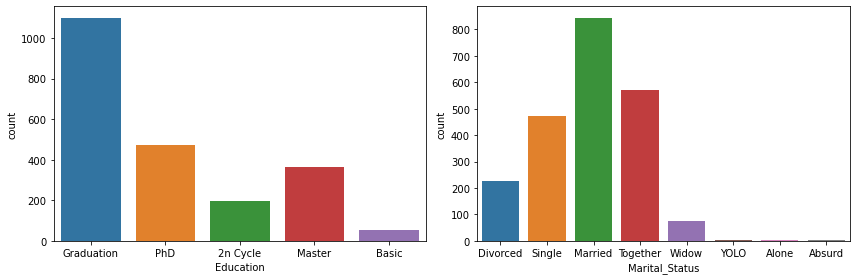

In [104]:
# Graph categorical features
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.countplot(x = "Education", data=data, ax=ax[0])
sns.countplot(x = "Marital_Status", data=data,  ax=ax[1])
plt.tight_layout()
plt.show()

There are some categories that could be grouped together in the marital status category.

In [105]:
def group_mstatus(df):
    '''Function to reduce the number of categories in marital status options.'''
    solo_status = ['YOLO', 'Alone', 'Absurd']
    df['Marital_Status'] = df['Marital_Status'].replace(solo_status, 'Single')
    together = ['Married', 'Together']
    df['Marital_Status'] = df['Marital_Status'].replace(together, 'Couple')
    return df

group_mstatus(data)
print(data.Marital_Status.unique())

['Divorced' 'Single' 'Couple' 'Widow']


In [106]:
# group by education and marital status
df_plot = data.groupby(['Marital_Status', 'Education']).size().unstack()
ed_cols = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
df_plot = df_plot[ed_cols]
df_plot

Education,Basic,Graduation,Master,2n Cycle,PhD
Marital_Status,,,,,
Couple,34,704,242,132,303
Divorced,1,116,37,23,49
Single,18,248,75,37,100
Widow,1,33,12,5,23


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Widow')])

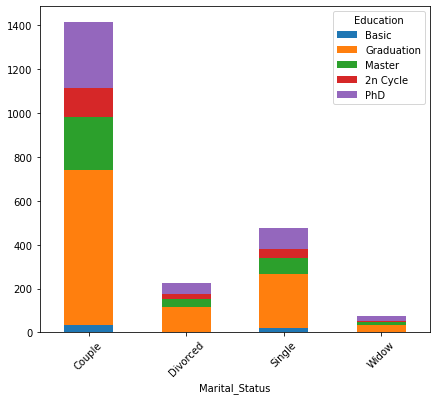

In [107]:
df_plot.plot(kind = 'bar', stacked=True, figsize=(7,6))
plt.xticks(rotation = 45)

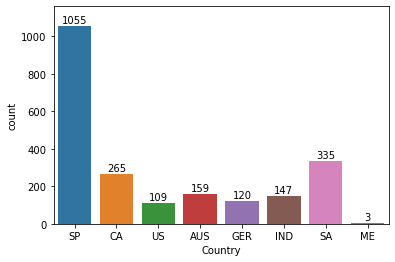

In [108]:
# plot country
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x = 'Country', data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.1)
plt.show()

Most customers are from the country Spain.

#### Distribution of Continuous variables

In [109]:
data_num = data.select_dtypes(include=np.number)

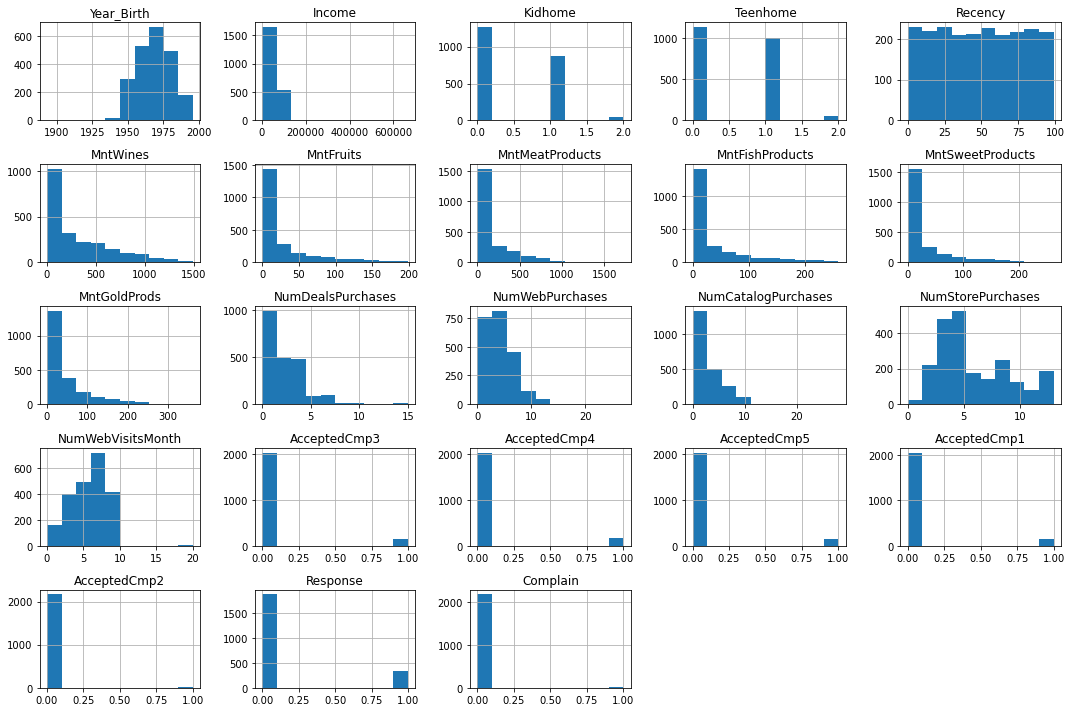

In [110]:
data_num.hist(figsize = (15, 10))
plt.tight_layout()
plt.show()

The year of birth and income appear to have some outliers. Let's have a closer look at these two features.

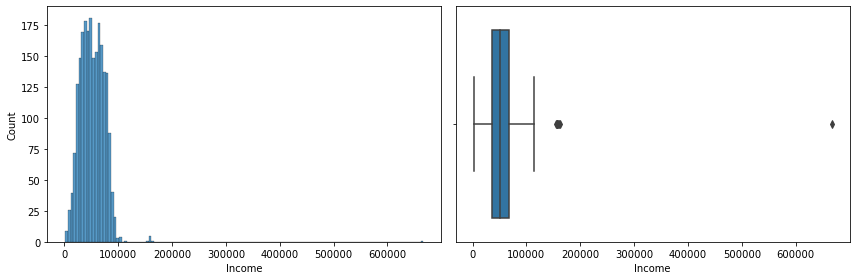

In [111]:
# plot income
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Income", data=data, ax=ax[0])
sns.boxplot(x="Income", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

In [112]:
data[data['Income'] > 160000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
497,1982,PhD,Couple,160803.0,0,0,8/4/12,21,55,16,...,1,0,0,0,0,0,0,0,0,US
527,1977,Graduation,Couple,666666.0,1,0,6/2/13,23,9,14,...,3,6,0,0,0,0,0,0,0,SA
731,1976,PhD,Couple,162397.0,1,1,6/3/13,31,85,1,...,1,1,0,0,0,0,0,0,0,SP


In [113]:
data.drop(index=527, inplace=True)

Although there are some values that are outliers based on this dataset, the values aren't unreasonable for income values and will be kept.

### Age

More meaning can be found in the age of a customer rather than the year of birth, so age will be used.

In [114]:
# calculate age of customer
data['Age'] = 2022 - data['Year_Birth']
# data.drop(columns=['Year_Birth'], inplace=True)

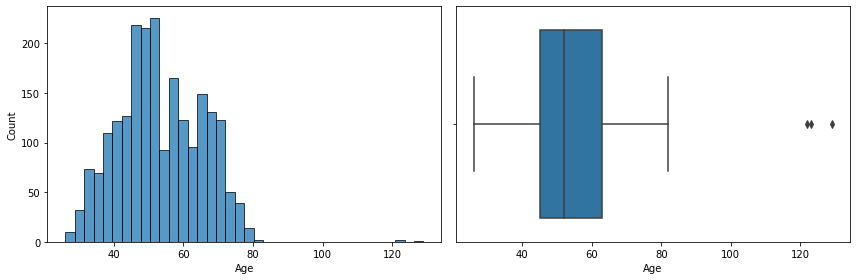

In [115]:
# plot Age
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Age", data=data, ax=ax[0])
sns.boxplot(x="Age", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

It seems unlikely that customers with an age of ~ 100+ years old would be alive and buying their own groceries.

The boxplot show us that there are a few outliers,

In [116]:
data.drop(data[data['Age'] >= 95].index, inplace=True)
# data.head()

### Length of Customer's Enrollment with Company

In [117]:
# change Dt_Customer column to a datetime column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')

In [118]:
# data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')
today = pd.to_datetime("today").strftime('%m-%d-%Y')

def customer_loyalty(df):
    ''' Calculate how long a customer has been part of a loyalty program (in years)'''
    # df['Length_customer'] = pd.to_datetime(dt.date.today()) - df['Dt_Customer']
    df['Length_customer'] = pd.to_datetime(today) - df['Dt_Customer']
    df['Length_customer'] = [float(str(df['Length_customer'][x])[:4]) for x in df.index]
    df['Length_customer'] = round(df['Length_customer']/365,2)
    df.rename(columns = {'Length_customer':'Length_customer_yrs'}, inplace = True)
    df.drop(columns='Dt_Customer', inplace = True)
    return df

customer_loyalty(data)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length_customer_yrs
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,0,0,0,0,0,1,0,SP,52,8.04
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,0,0,0,1,1,0,CA,61,8.04
2,1958,Graduation,Couple,67267.0,0,1,0,134,11,59,...,0,0,0,0,0,0,0,US,64,8.13
3,1967,Graduation,Couple,32474.0,1,1,0,10,0,1,...,0,0,0,0,0,0,0,AUS,55,8.14
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,1,0,0,0,0,1,0,SP,33,8.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,99,372,18,126,...,0,0,0,0,0,0,0,US,46,9.32
2236,1977,2n Cycle,Couple,31056.0,1,0,99,5,10,13,...,0,0,0,0,0,0,0,SP,45,9.44
2237,1976,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,0,0,0,0,0,0,0,SP,46,9.57
2238,1978,Graduation,Couple,65819.0,0,0,99,267,38,701,...,0,0,0,0,0,0,0,IND,44,9.58


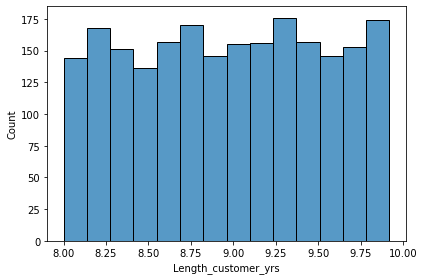

In [119]:
# plot length of enrollment with the company
sns.histplot(x = "Length_customer_yrs", data=data)
plt.tight_layout()
plt.show()

### Number of Dependents

In [120]:
# create dependents feature for kid and teen at home
data['Dependents'] = data['Kidhome'] + data['Teenhome']

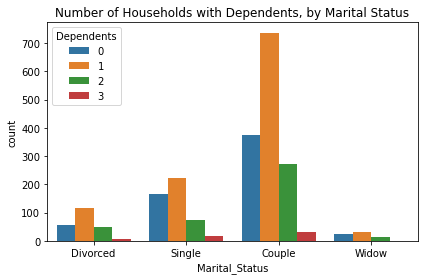

In [121]:
fig, ax = plt.subplots()
sns.countplot(x = 'Marital_Status', data=data, hue='Dependents')
plt.title("Number of Households with Dependents, by Marital Status")
plt.tight_layout()
plt.show()

### Total Monetary Value

How much has each customer spent?

In [122]:
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] \
    + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length_customer_yrs,Dependents,Total_Spent
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,0,0,0,1,0,SP,52,8.04,0,1190
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,0,1,1,0,CA,61,8.04,0,577
2,1958,Graduation,Couple,67267.0,0,1,0,134,11,59,...,0,0,0,0,0,US,64,8.13,1,251
3,1967,Graduation,Couple,32474.0,1,1,0,10,0,1,...,0,0,0,0,0,AUS,55,8.14,2,11
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,0,0,0,1,0,SP,33,8.23,1,91


In [123]:
# calculate how much of the total amount was spent on each sub-category
for cat in data.filter(regex='Mnt', axis = 1).columns:
    if (cat != "Total_Spent"):
        data[cat] = round(data[cat] / data["Total_Spent"] * 100, 2)

In [124]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length_customer_yrs,Dependents,Total_Spent
0,1970,Graduation,Divorced,84835.0,0,0,0,15.88,8.74,31.85,...,0,0,0,1,0,SP,52,8.04,0,1190
1,1961,Graduation,Single,57091.0,0,0,0,80.42,0.87,11.09,...,0,0,1,1,0,CA,61,8.04,0,577
2,1958,Graduation,Couple,67267.0,0,1,0,53.39,4.38,23.51,...,0,0,0,0,0,US,64,8.13,1,251
3,1967,Graduation,Couple,32474.0,1,1,0,90.91,0.00,9.09,...,0,0,0,0,0,AUS,55,8.14,2,11
4,1989,Graduation,Single,21474.0,1,0,0,6.59,17.58,26.37,...,0,0,0,1,0,SP,33,8.23,1,91


Text(0.5, 0, 'Total Amount of Money Spent')

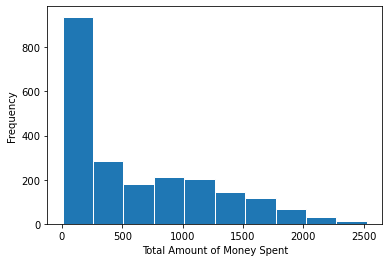

In [125]:
data['Total_Spent'].plot(kind='hist', bins=10, edgecolor='white')
plt.xlabel('Total Amount of Money Spent')

#### Amount of Money Spent on Different Types of Products

In [126]:
def get_mnt_cols(df):
    return list(df.filter(regex='Mnt', axis = 1).columns)

col_mnt = get_mnt_cols(data)

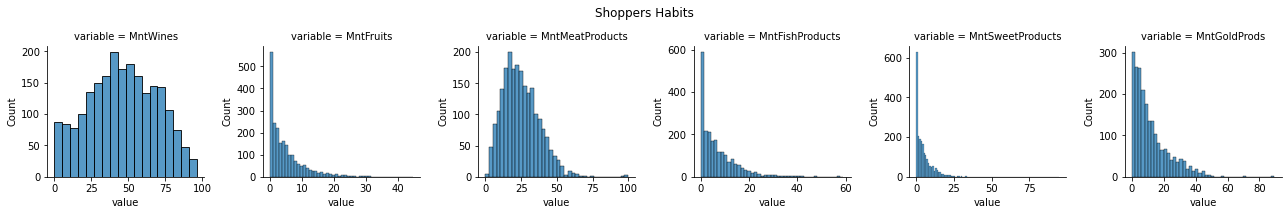

In [127]:
def graph_amount_spent():
    df_mnt = data[col_mnt]

# plot the mnt columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
    graph = sns.FacetGrid(
    df_mnt.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False)
    graph.map(sns.histplot, "value")
    graph.fig.subplots_adjust(top=0.8)
    graph.fig.suptitle("Shoppers Habits")
    plt.show()

graph_amount_spent()

Wine is the biggest seller followed by meat products.

### Shoppers Frequency

How many times have customers made a purchase?

In [128]:
def get_purchases_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Purchases' in col]

col_habits = get_purchases_cols(data)
col_habits.extend(['Recency', 'NumWebVisitsMonth'])
# print(col_habits)

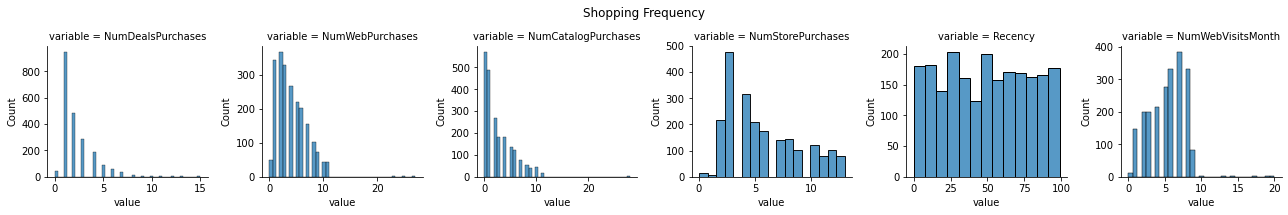

In [129]:
def graph_num_purchases():
    df_hab = data[col_habits]

# plot the mnt columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
    graph = sns.FacetGrid(
    df_hab.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False)
    graph.map(sns.histplot, "value")
    graph.fig.subplots_adjust(top=0.8)
    graph.fig.suptitle("Shopping Frequency")
    plt.show()

graph_num_purchases()

In [130]:
# Create a new column to indicate the total number of purchases made
data['Tot_Num_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

<AxesSubplot:xlabel='Tot_Num_Purchases', ylabel='Count'>

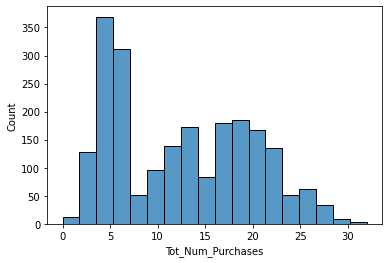

In [131]:
sns.histplot(x ="Tot_Num_Purchases", data=data)

In [132]:
len(data[data['Tot_Num_Purchases'] == 0])

6

In [133]:
# What is the average number of purchases for customers
data['Tot_Num_Purchases'].replace(0, np.nan, inplace=True)
data['Tot_Num_Purchases'].fillna(data['Tot_Num_Purchases'].mode(), inplace=True)
len(data[data['Tot_Num_Purchases'] == 0])

0

In [134]:
data[data['Total_Spent'] < 10]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length_customer_yrs,Dependents,Total_Spent,Tot_Num_Purchases
32,1972,PhD,Couple,34578.0,2,1,1,87.50,0.00,12.50,...,0,0,0,0,AUS,50,8.22,3,8,3.0
233,1961,PhD,Couple,32583.0,1,1,10,55.56,0.00,33.33,...,0,0,0,0,SP,61,8.04,2,9,3.0
456,1965,Graduation,Divorced,4861.0,0,0,20,33.33,16.67,16.67,...,0,0,0,0,SA,57,8.02,0,6,NaN
663,1963,PhD,Couple,4023.0,1,1,29,55.56,0.00,11.11,...,0,0,0,0,SP,59,8.02,2,9,NaN
1291,1973,Graduation,Single,3502.0,1,0,56,40.00,20.00,20.00,...,0,0,0,0,IND,49,9.21,1,5,NaN
1466,1971,Graduation,Divorced,1730.0,0,0,65,12.50,12.50,37.50,...,0,0,0,0,SP,51,8.12,0,8,NaN
1472,1974,Graduation,Couple,33590.0,2,1,65,50.00,0.00,25.00,...,0,0,0,0,CA,48,8.65,3,8,3.0
1826,1975,Graduation,Divorced,153924.0,0,0,81,16.67,16.67,16.67,...,0,0,0,0,SP,47,8.39,0,6,NaN
1925,1949,PhD,Couple,156924.0,0,0,85,25.00,12.50,25.00,...,0,0,0,0,CA,73,8.84,0,8,NaN


Having a total number of purchases as 0 while indicating the money has been spent (as shown in other columns) will cause problems.

<AxesSubplot:xlabel='Tot_Num_Purchases', ylabel='Total_Spent'>

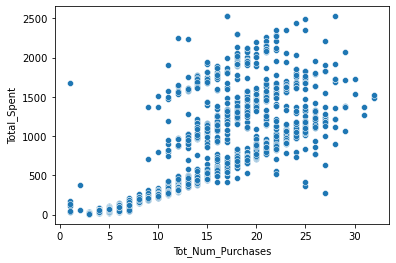

In [135]:
sns.scatterplot(x="Tot_Num_Purchases", y="Total_Spent", data=data)

In [136]:
# sns.scatterplot(x="Tot_Num_Purchases", y="Total_Spent", data=data, hue="Marital_Status")

#### Some Specific Questions related to the money spent by customers

Text(0, 0.5, 'Total Amount Spent ($)')

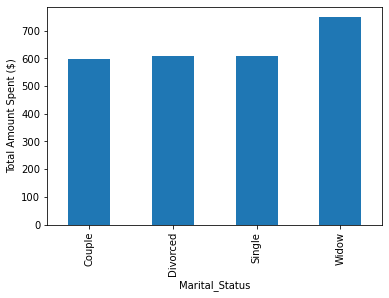

In [137]:
# plot the average amount of money spent by each customer depending on marital status
data.groupby('Marital_Status')['Total_Spent'].mean().plot(kind='bar',)
plt.ylabel('Total Amount Spent ($)')

Text(0, 0.5, 'Total Amount Spent by Customer')

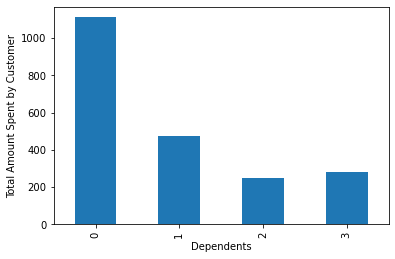

In [138]:
# Does the amount of money does a household spends depend on the number of dependents?
data_dep = data.groupby(['Dependents'])['Total_Spent'].mean()
data_dep.plot(kind = 'bar',)
plt.ylabel("Total Amount Spent by Customer")

Households with more than one dependent results in less money being spent at the store.

Text(0.5, 1.0, 'Total Amount Spent by Different Households,\n by number of dependents')

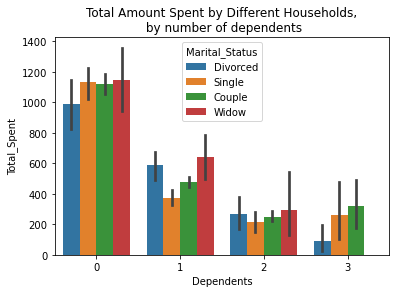

In [139]:
sns.barplot(x= 'Dependents', y = 'Total_Spent', data=data, hue='Marital_Status')
plt.title("Total Amount Spent by Different Households,\n by number of dependents")

How much money did each customer spend each time they made a purchase?

In [140]:
data["Spent per purchase"] = round(data["Total_Spent"] / data["Tot_Num_Purchases"], 2)
# data.head()

<AxesSubplot:xlabel='Spent per purchase', ylabel='Count'>

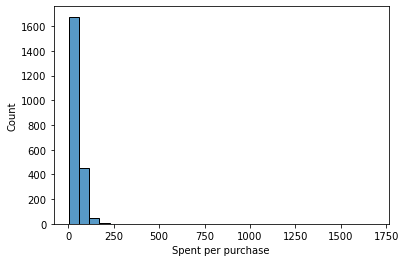

In [141]:
sns.histplot(x="Spent per purchase", data=data, bins=30)

<AxesSubplot:ylabel='Spent per purchase'>

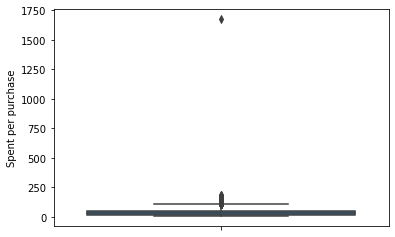

In [142]:
sns.boxplot(y="Spent per purchase", data=data)

In [144]:
data.loc[data['Spent per purchase'].idxmax()]

Year_Birth                 1978
Education              2n Cycle
Marital_Status           Couple
Income                  51411.0
Kidhome                       0
Teenhome                      0
Recency                      53
MntWines                   1.91
MntFruits                  0.12
MntMeatProducts           95.71
MntFishProducts            0.71
MntSweetProducts           0.24
MntGoldProds               1.31
NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             1
NumWebVisitsMonth             0
AcceptedCmp3                  0
AcceptedCmp4                  1
AcceptedCmp5                  0
AcceptedCmp1                  0
AcceptedCmp2                  0
Response                      0
Complain                      0
Country                     IND
Age                          44
Length_customer_yrs        9.88
Dependents                    0
Total_Spent                1679
Tot_Num_Purchases           1.0
Spent pe

In [145]:
# drop item that is outlier
data.drop(index=1213, inplace=True)

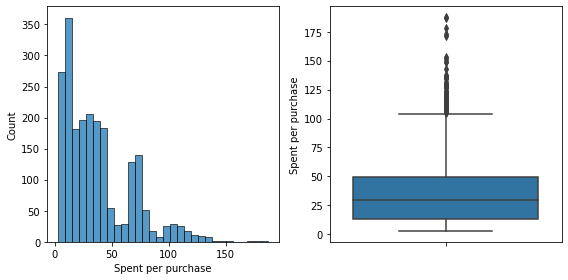

In [146]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))
sns.histplot(x="Spent per purchase", data=data, bins=30, ax=ax[0])
sns.boxplot(y="Spent per purchase", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

If a customer complains, does that reflect in the amount of money a customer has spent in the store?

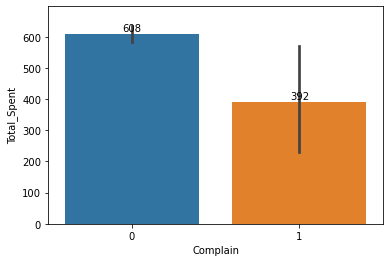

In [147]:
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(x="Complain", y="Total_Spent", data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.1)
plt.show()

### Campaign Success

In [148]:
# total number of past accepted campaigns
data['Total_Accepted_Camp'] = np.sum(data.filter(regex="Cmp"), axis=1)

def get_cmp_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Cmp' in col]

cmp_cols = get_cmp_cols(data)

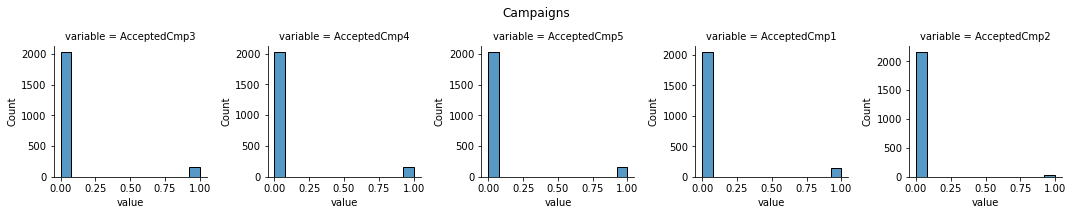

In [149]:
df_cmp = data[cmp_cols]

# plot the cmp columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
graph = sns.FacetGrid(
    df_cmp.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False)
graph.map(sns.histplot, "value")
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle("Campaigns")
plt.show()

<AxesSubplot:ylabel='Total_Accepted_Camp'>

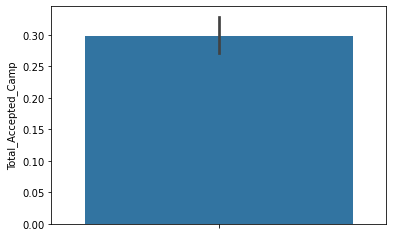

In [150]:
# percent of the total number of campaigns accepted by customers
sns.barplot(y='Total_Accepted_Camp', data=data)

About one-third of customers have responded to a past campaign.

## Save File

In [151]:
data.to_csv("processed_data2.csv", index=False)